Breast cancer remains a leading cause of cancer-related deaths among women. Detecting it early through accurate classification can significantly improve treatment outcomes. In this analysis, we will explore the Breast Cancer Wisconsin dataset to identify the most important features that distinguish malignant from benign tumors. The main goal is to develop a reliable predictive model that can assist medical professionals in diagnosis.

In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport 

In [86]:
df =pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [87]:
'''profile = ProfileReport(df,title='Data Report',explorative=True)
profile.to_file('Report.html')'''

"profile = ProfileReport(df,title='Data Report',explorative=True)\nprofile.to_file('Report.html')"

In [88]:
df.shape

(569, 33)

In [89]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

| **Feature**               | **Meaning**                                              | **Relation to Cancer**                                      |
| ------------------------- | -------------------------------------------------------- | ----------------------------------------------------------- |
| **1. Radius**             | Average distance from center to perimeter (nucleus size) | 🔺 *Higher* in malignant tumors (larger nuclei)             |
| **2. Texture**            | Variation in gray-scale intensity                        | 🔺 *Higher* in malignant cells (more uneven texture)        |
| **3. Perimeter**          | Length of nucleus boundary                               | 🔺 *Higher* in malignant cells (irregular edges)            |
| **4. Area**               | Total nucleus area                                       | 🔺 *Higher* in malignant cells (bigger nuclei)              |
| **5. Smoothness**         | Local variation in radius lengths                        | 🔻 *Lower* in malignant cells (less smooth, more irregular) |
| **6. Compactness**        | (Perimeter² / Area − 1.0), shape tightness               | 🔺 *Higher* in malignant cells (less compact, irregular)    |
| **7. Concavity**          | Severity of inward curvatures                            | 🔺 *Higher* in malignant cells (more deformed shapes)       |
| **8. Concave Points**     | Number of concave portions                               | 🔺 *Higher* in malignant cells (many contour indentations)  |
| **9. Symmetry**           | Balance between both sides of the nucleus                | 🔻 *Lower* in malignant cells (asymmetrical shapes)         |
| **10. Fractal Dimension** | Boundary complexity                                      | 🔺 *Higher* in malignant cells (rough, uneven edges)        |


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
df.duplicated().sum()

np.int64(0)

In [92]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

<Axes: >

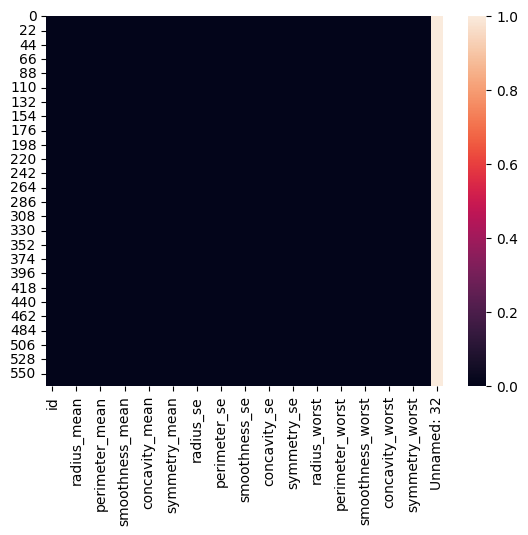

In [93]:
sns.heatmap(df.isnull(),annot=False)

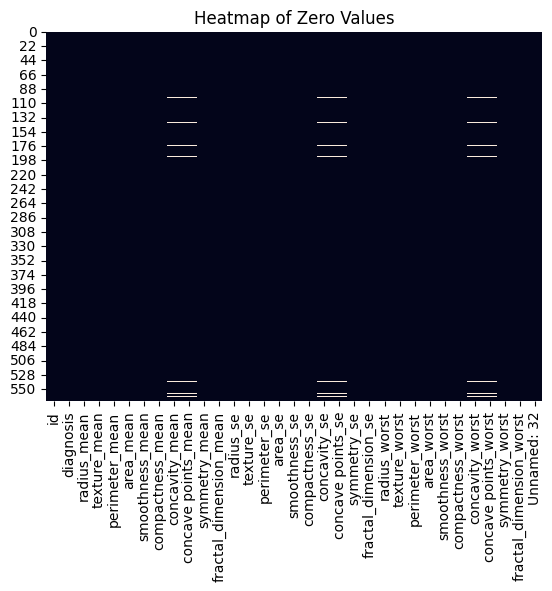

In [94]:
sns.heatmap(df == 0, annot=False, cbar=False)
plt.title("Heatmap of Zero Values")
plt.show()

During the analysis, I found that several samples had feature values related to concavity (e.g., concavity_mean, concavity_se, concave_points_mean) equal to 0.  
Initially, this raised concern about potential data entry or preprocessing errors.  
However, after reviewing medical and imaging references, I confirmed that a concavity value of 0 can be physiologically valid — it indicates a tumor with perfectly smooth edges, which is characteristic of benign tumors.  

To validate this assumption, I examined all rows where concavity_mean = 0 and compared their diagnosis labels.  
The analysis showed that 100% of these cases were labeled as Benign, confirming that the zero values are consistent with the biological interpretation rather than being missing or incorrect data.  

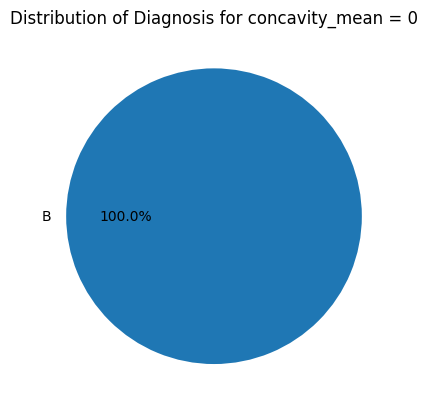

In [95]:
df_0 = df[df['concavity_mean'] == 0]
df_0['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Diagnosis for concavity_mean = 0")
plt.ylabel("")  
plt.show()

In [96]:
df.drop(columns=['id','Unnamed: 32'],inplace=True) # remove unimportant columns

In [97]:
df1=df[df.columns[0:11]]
df2=df[df.columns[11:22]]
df3=df[df.columns[22:len(df.columns)]]

In [98]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


| **Feature**                | **Observation**                                                                                        |
| -------------------------- | ------------------------------------------------------------------------------------------------------ |
| **radius_mean**            | mean ≈ 14.1, max = 28.1 → more than double the average → 🔺 presence of *outliers* (very large cells). |
| **texture_mean**           | mean = 19.3, max = 39.3 → nearly twice the mean → possible *outliers*, typical in malignant cells.     |
| **perimeter_mean**         | mean = 91.9, max = 188.5 → about 2× the mean → malignant cells are usually much larger.                |
| **area_mean**              | mean = 654.9, max = 2501 → 🔺 extremely high (≈ 4× mean) → clear *outliers*, likely malignant cases.   |
| **smoothness_mean**        | mean = 0.096, std = 0.014 → values are relatively consistent, max = 0.163 → no major issue.            |
| **compactness_mean**       | mean = 0.104, max = 0.345 → around 3× the mean → likely natural due to varying cell shapes.            |
| **concavity_mean**         | mean = 0.089, max = 0.427 → about 5× the mean → 🔺 strong irregularity, typical for malignant cells.   |
| **concave points_mean**    | mean = 0.049, max = 0.201 → about 4× the mean → clear *outliers*, linked to abnormal cell structure.   |
| **symmetry_mean**          | mean = 0.181, std = 0.027 → within normal range → no problem detected.                                 |
| **fractal_dimension_mean** | mean = 0.063, max = 0.097 → very narrow range → stable feature, no indication of anomaly.              |


In [99]:
df2.describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000


| **Feature**              | **Observation**                                                                                                |
| ------------------------ | -------------------------------------------------------------------------------------------------------------- |
| **radius_se**            | mean = 0.41, max = 2.87 → 🔺 about 7× higher → clear *outliers*, likely malignant (large variation in radius). |
| **texture_se**           | mean = 1.22, max = 4.89 → about 4× the mean → some *outliers*, typical for irregular cancer cells.             |
| **perimeter_se**         | mean = 2.87, max = 21.98 → ≈ 8× the mean → strong sign of *outliers*, common in malignant samples.             |
| **area_se**              | mean = 40.3, max = 542.2 → ≈ 13× the mean → 🔺 extreme values, likely cancer-related irregularities.           |
| **smoothness_se**        | mean = 0.007, max = 0.031 → small spread → feature is stable, no serious anomalies.                            |
| **compactness_se**       | mean = 0.025, max = 0.135 → 5× higher → may indicate shape variation in malignant cells.                       |
| **concavity_se**         | mean = 0.032, max = 0.396 → about 12× higher → 🔺 strong *outliers*, linked to cancer concavities.             |
| **concave points_se**    | mean = 0.012, max = 0.053 → 4× higher → *outliers* appear, but range is still moderate.                        |
| **symmetry_se**          | mean = 0.021, max = 0.079 → about 4× higher → mild *outliers*, possibly linked to irregular cell shapes.       |
| **fractal_dimension_se** | mean = 0.0038, max = 0.0298 → narrow range → stable feature, no major anomalies.                               |
| **radius_worst**         | mean = 16.27, max = 36.04 → >2× the mean → 🔺 clear *outliers*, representing largest abnormal cell sizes.      |


In [100]:
df3.describe()

,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


| **Feature**                 | **Observation**                                                                                               |
| --------------------------- | ------------------------------------------------------------------------------------------------------------- |
| **texture_worst**           | mean = 25.7, max = 49.5 → nearly 2× mean → *outliers* appear, typical in malignant tumors with rough texture. |
| **perimeter_worst**         | mean = 107.3, max = 251.2 → >2× mean → 🔺 strong *outliers*, indicating very large abnormal cell perimeters.  |
| **area_worst**              | mean = 880.6, max = 4254 → 🔺 about 5× mean → extreme *outliers*, likely severe malignant cases.              |
| **smoothness_worst**        | mean = 0.132, max = 0.223 → mild variation, within a realistic range.                                         |
| **compactness_worst**       | mean = 0.254, max = 1.058 → ≈ 4× mean → *outliers* showing high cell compactness (typical in malignancy).     |
| **concavity_worst**         | mean = 0.272, max = 1.252 → ≈ 5× mean → 🔺 major *outliers*, strong sign of malignant cells.                  |
| **concave points_worst**    | mean = 0.115, max = 0.291 → about 3× mean → *outliers* related to contour irregularities.                     |
| **symmetry_worst**          | mean = 0.290, max = 0.664 → ≈ 2× mean → higher asymmetry → typical of malignant samples.                      |
| **fractal_dimension_worst** | mean = 0.084, max = 0.208 → about 2.5× mean → *outliers* show highly complex and irregular cell borders.      |


## The outliers are not “noise” here — they are signals of the disease itself.

C:\Users\Mmahm\AppData\Local\Temp\ipykernel_14016\491582011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


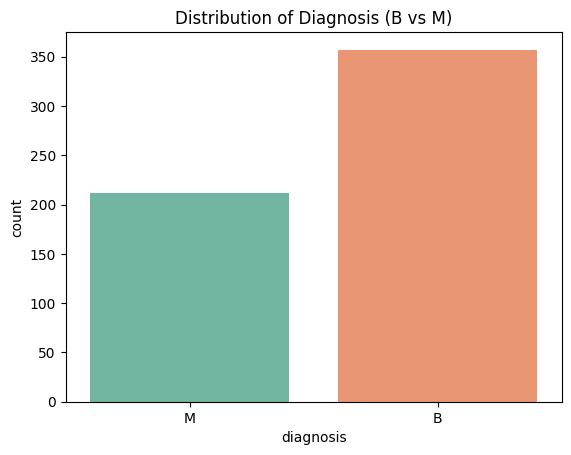

In [101]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (B vs M)')
plt.show()

In [102]:
df['diagnosis']= df['diagnosis'].map({'B':0,'M':1})

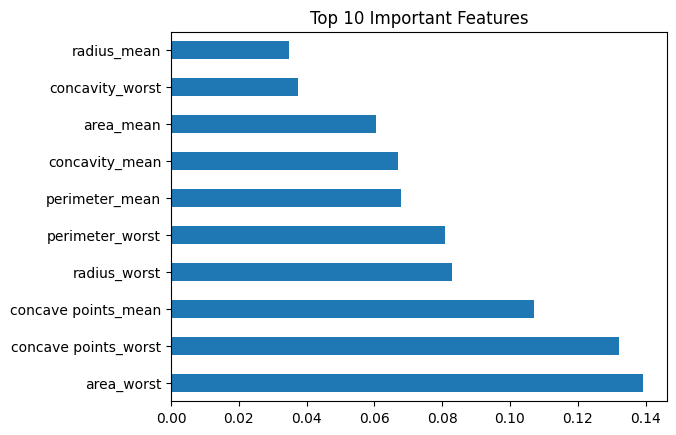

In [103]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


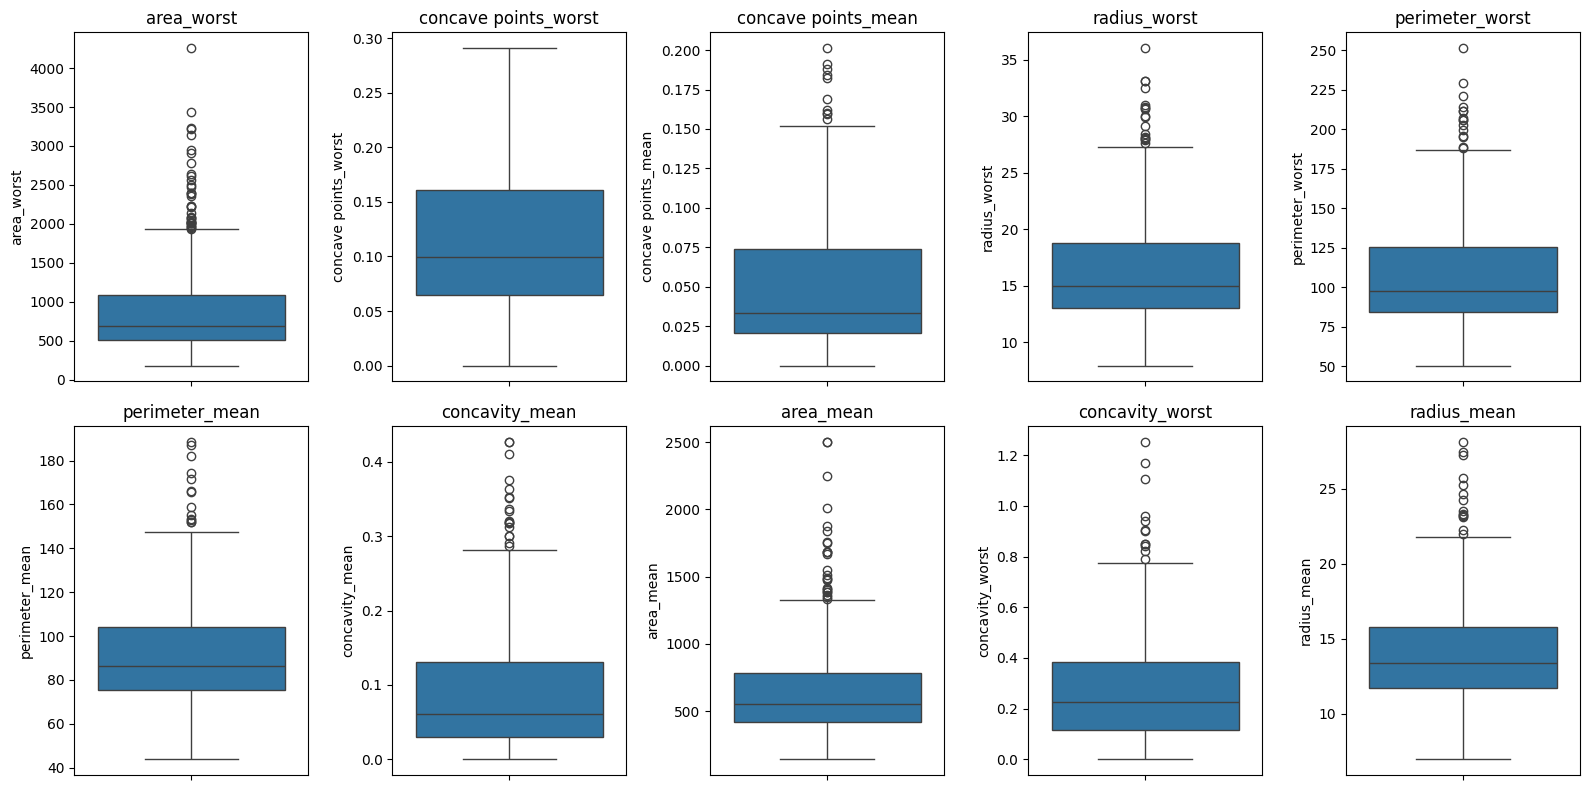

In [104]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(importance.head(10).index, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()    

## We noticed extreme values. Were these measurement errors, or were they the disease itself? 

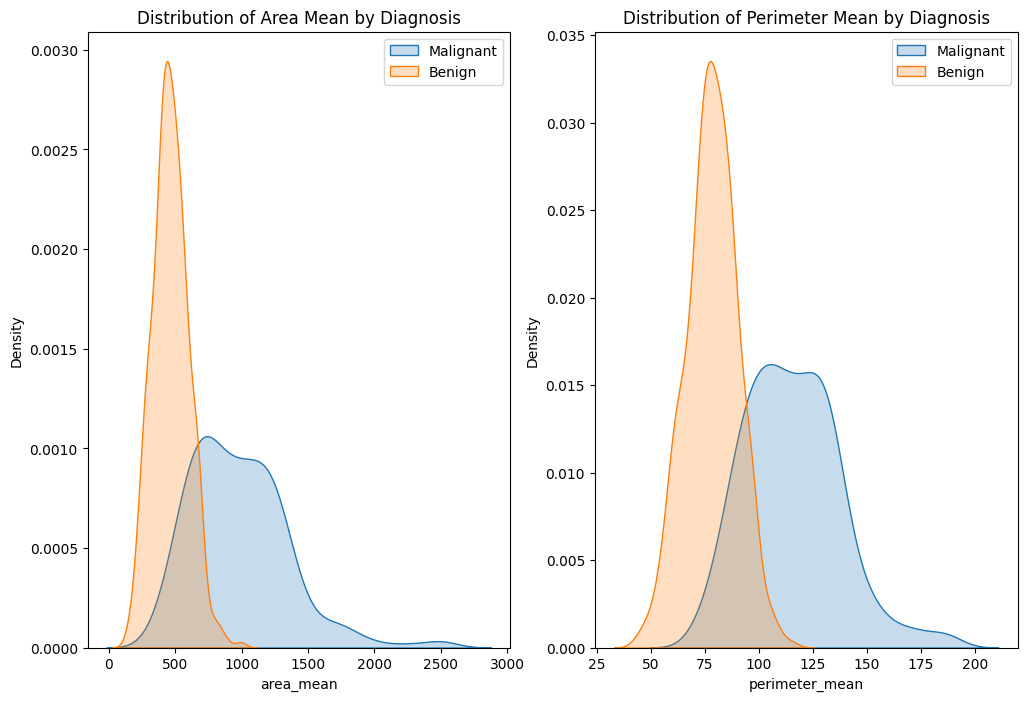

In [110]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.kdeplot(df[df['diagnosis']==1]['area_mean'], label='Malignant', fill=True)
sns.kdeplot(df[df['diagnosis']==0]['area_mean'], label='Benign', fill=True)
plt.title('Distribution of Area Mean by Diagnosis')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(df[df['diagnosis']==1]['perimeter_mean'], label='Malignant', fill=True)
sns.kdeplot(df[df['diagnosis']==0]['perimeter_mean'], label='Benign', fill=True)
plt.title('Distribution of Perimeter Mean by Diagnosis')
plt.legend()

plt.show()

C:\Users\Mmahm\AppData\Local\Temp\ipykernel_14016\4258792746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='coolwarm')
C:\Users\Mmahm\AppData\Local\Temp\ipykernel_14016\4258792746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='coolwarm')
C:\Users\Mmahm\AppData\Local\Temp\ipykernel_14016\4258792746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='coolwarm')
C:\Users\Mmahm\AppData\Local\Temp\ipykernel_14016\42587

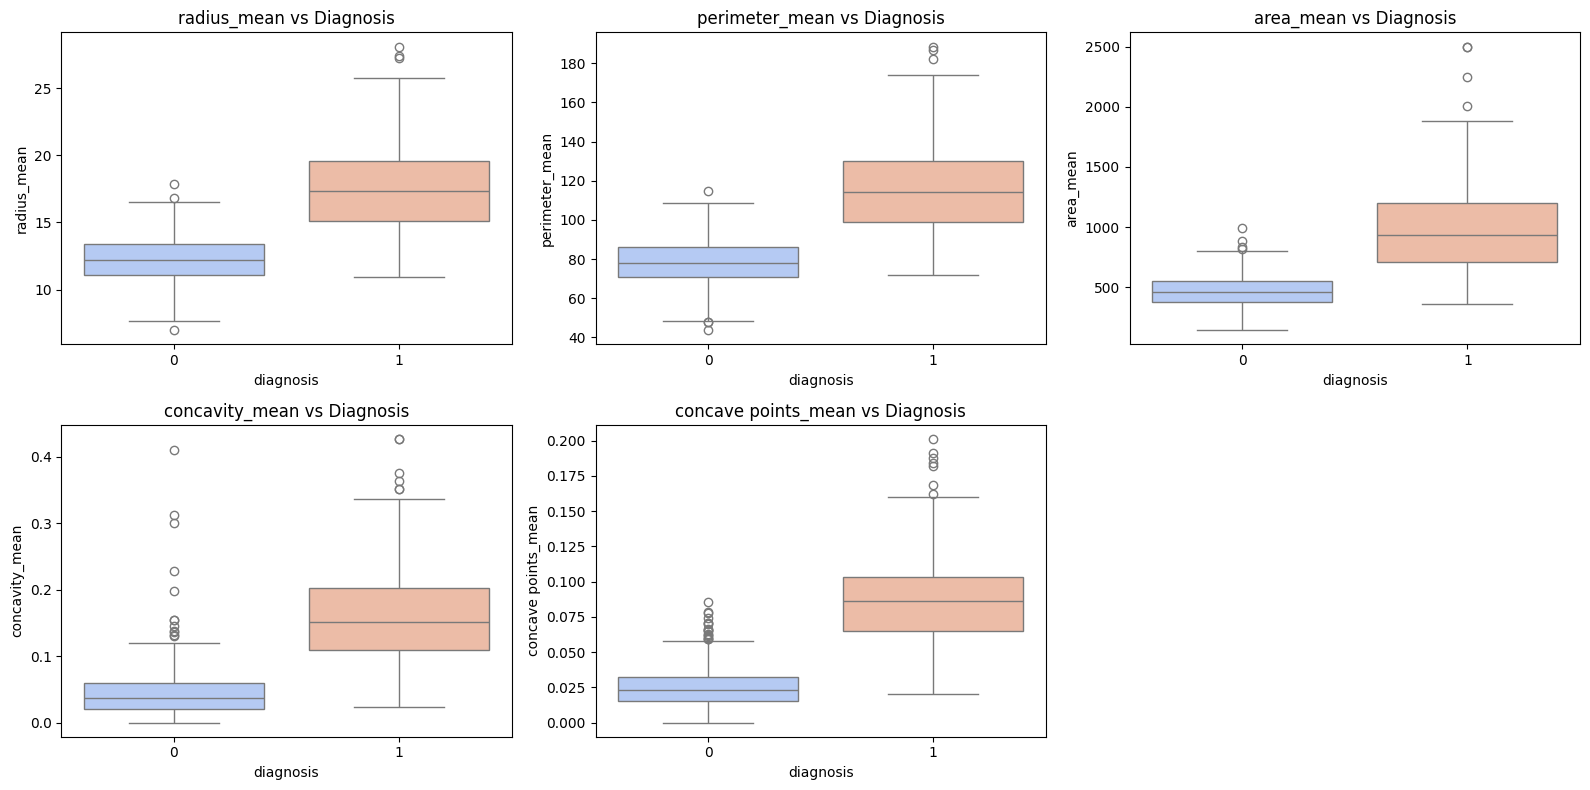

In [106]:
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

plt.figure(figsize=(16, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Diagnosis')

plt.tight_layout()
plt.show()

In fact, malignant tumors tend to have a higher radius, circumference, and 
concavity  

The previous graphs show us the reason of outliers are the malignant tumors so ,here the 
outliers are the solution .  

And If we revisited the first boxplots graph we will find Our analysis showed that 
the most influential features displayed extremely high positive outliers, which 
also had the strongest correlations with the target variable.
These outliers were not anomalies — they were the signal of disease itself, 
reflecting how malignant cells diverge from normal biological patterns

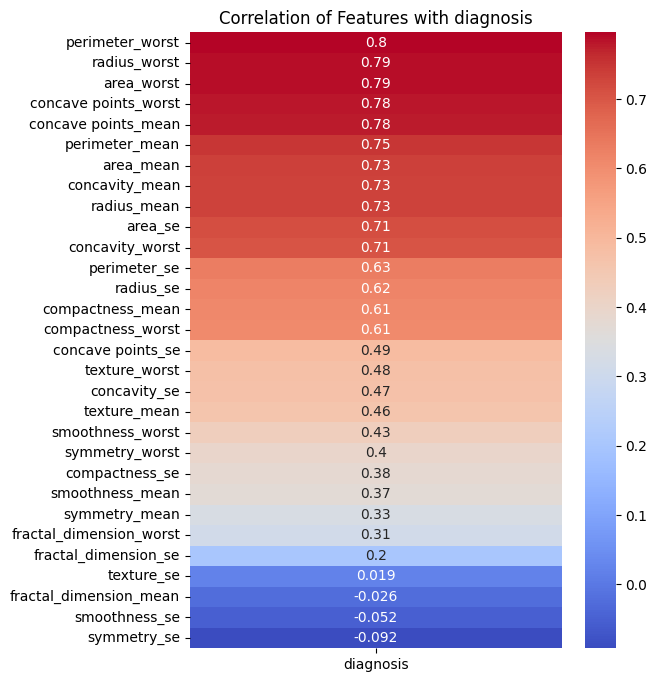

In [107]:
target_corr=df.corr(numeric_only=True ,method='spearman')['diagnosis'].drop('diagnosis').sort_values(ascending=False) 
plt.figure(figsize=(6,8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation of Features with diagnosis")
plt.show()

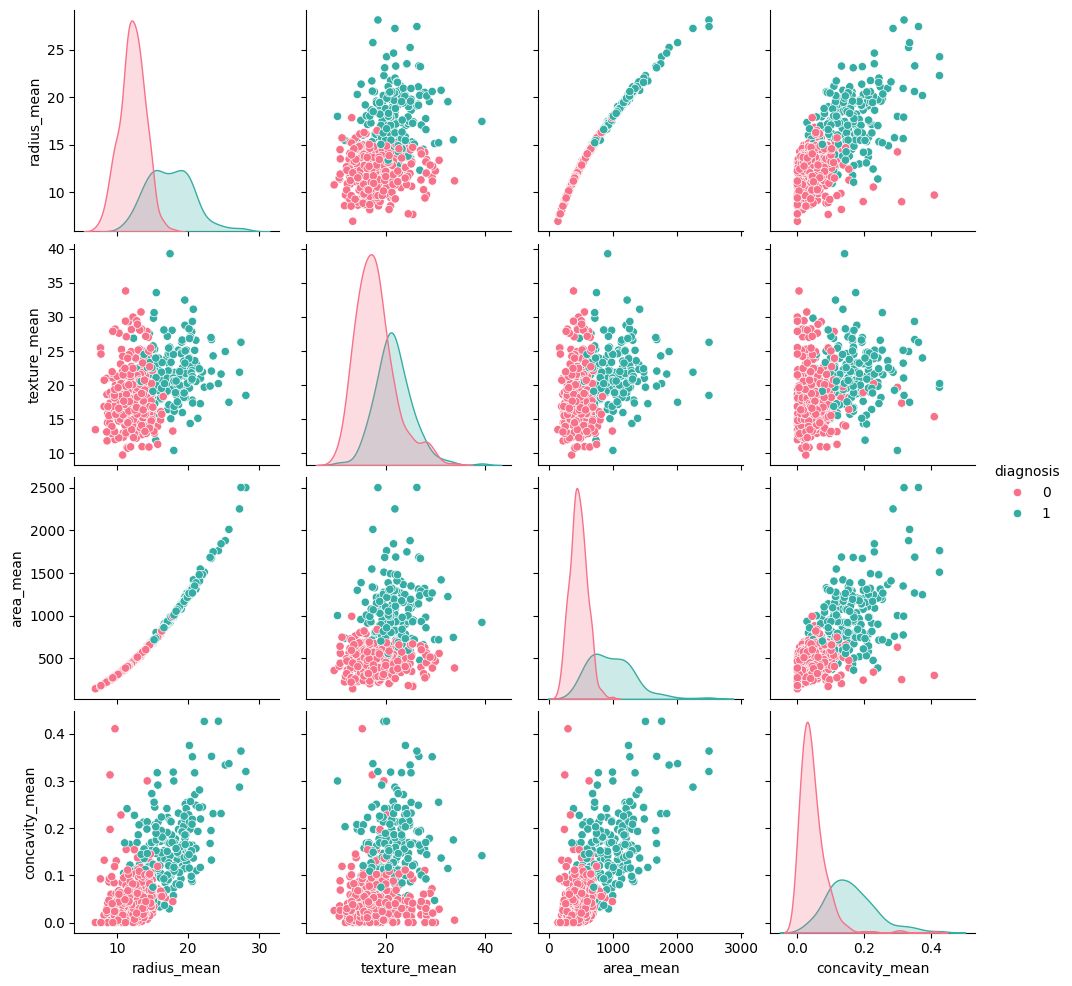

In [108]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'diagnosis']], hue='diagnosis', palette='husl')
plt.show()


In [109]:
df.to_csv('cleaned_data.csv',index=False)

In [117]:
df_impo = df[ list(importance.keys())[:10] + ['diagnosis'] ]

In [119]:
df_impo.to_csv('the_top_10.csv')